# Introdução


O projeto **Cocoroca** tem como objetivo aplicar técnicas de **Inteligência Artificial e Aprendizado de Máquina** para apoiar a tomada de decisão em uma fazenda de médio porte, com aproximadamente **200 hectares** destinados a diferentes culturas agrícolas. A iniciativa surge da necessidade de **compreender como fatores climáticos e de solo influenciam a produtividade agrícola** e, a partir dessa análise, desenvolver **modelos preditivos capazes de estimar o rendimento das safras**.

Para isso, foi disponibilizada a base de dados **“crop\_yield.csv”**, que contém informações sobre **precipitação, umidade específica e relativa, temperatura a 2 metros do solo** e o **rendimento real (t/ha)** de 12 diferentes culturas. Esses dados oferecem uma oportunidade valiosa para explorar tanto **padrões ocultos nos registros históricos** quanto para construir **modelos preditivos robustos**.

O desenvolvimento do projeto será dividido em duas frentes principais:

* **Análise Não Supervisionada:** aplicação de técnicas de **Exploração de Dados (EDA)** e **clusterização**, com o objetivo de identificar padrões, regimes climáticos semelhantes e possíveis outliers que impactam a produtividade.
* **Análise Supervisionada:** construção e comparação de cinco modelos de regressão supervisionada (**Random Forest, XGBoost, SVR, Lasso e Regressão Linear**) para prever o rendimento agrícola com base nas condições meteorológicas.

Ao final, o **Cocoroca** fornecerá não apenas previsões mais precisas para o rendimento das culturas, mas também **insights estratégicos sobre quais condições climáticas favorecem cada tipo de plantio**, possibilitando à fazenda otimizar seu planejamento de **plantio, irrigação e manejo agrícola**, aumentando assim sua produtividade e sustentabilidade.

# 1 - instalação das bibliotecas

In [10]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

#!pip install xgboost
#!pip install --upgrade pip
#!pip install --upgrade --force-reinstall xgboost


## 1.2 Instalação das Bibliotecas

In [26]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - pré-processamento e clusterização
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Regressão supervisionada (modelos solicitados)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Avaliação de modelos
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")


# 2 - Carregando o Dataset

In [13]:
# Carregar o dataset
df = pd.read_csv('../dados/crop_yield.csv')

# Visualizar as primeiras linhas
df.head()


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# 4 - Inspeção Geral dos Dados

nessa etapa iremos verificar o formato e tipo das colunas, as estatísticas descritivas e se há valores ausentes

In [14]:
# Verificar o formato e os tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


In [15]:
# Estatísticas descritivas
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [8]:
# Verificar valores ausentes
df.isnull().sum()

Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64

# 5 - Visualização Inicial dos Dados

nessa seção, graficos seram criados para melhor entendimento dos dados

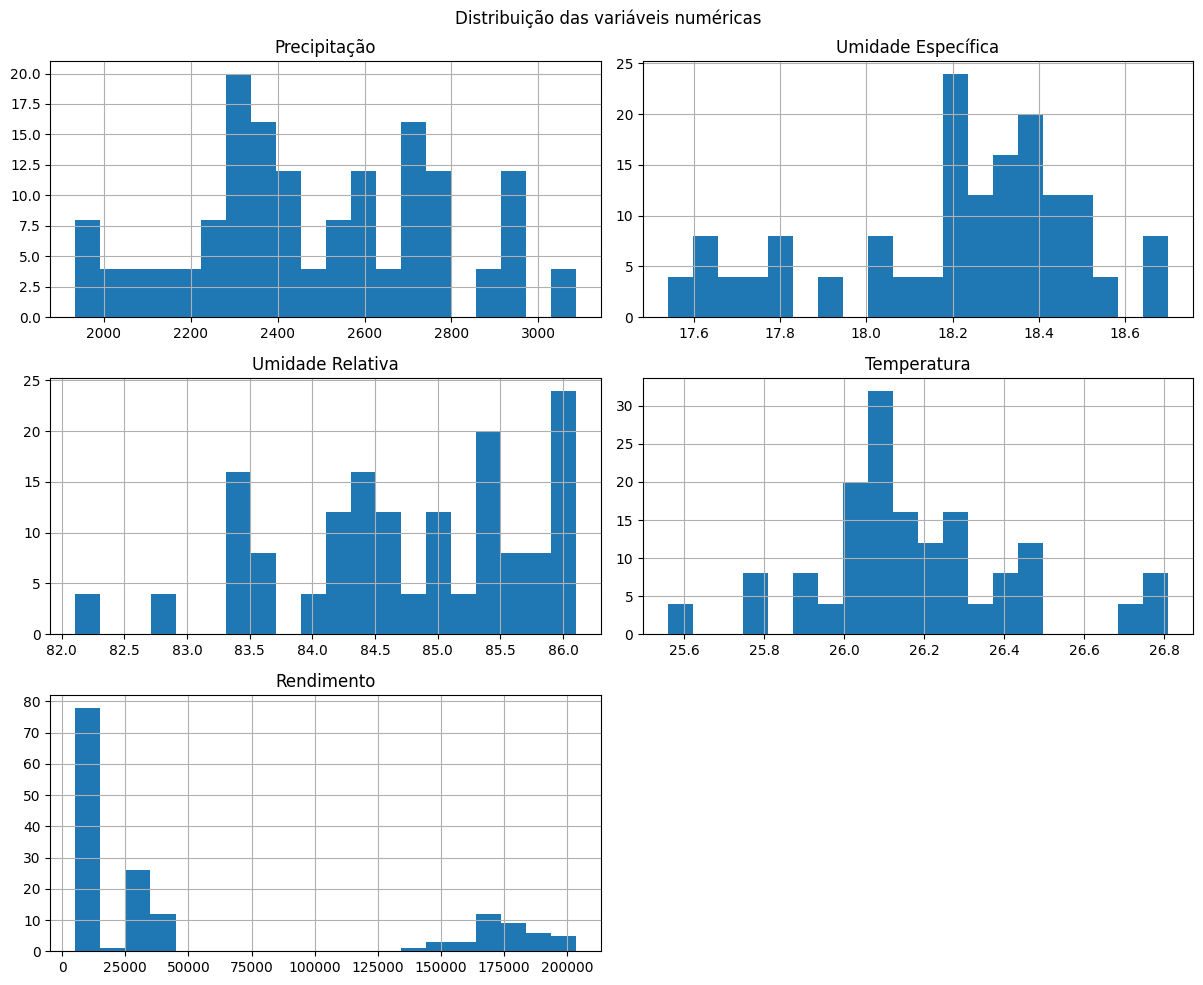

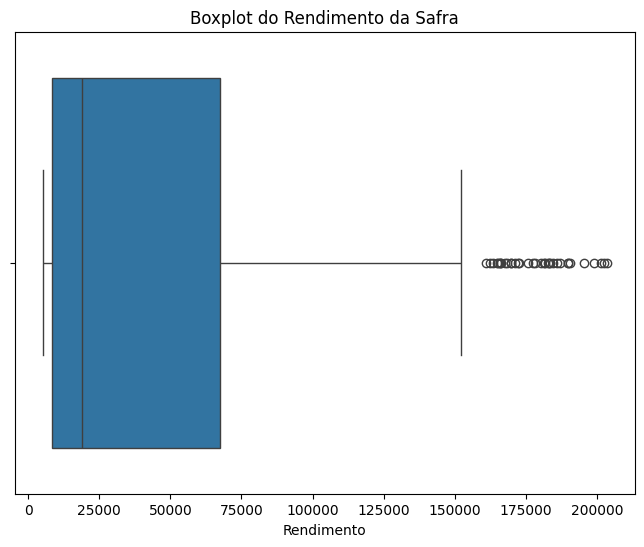

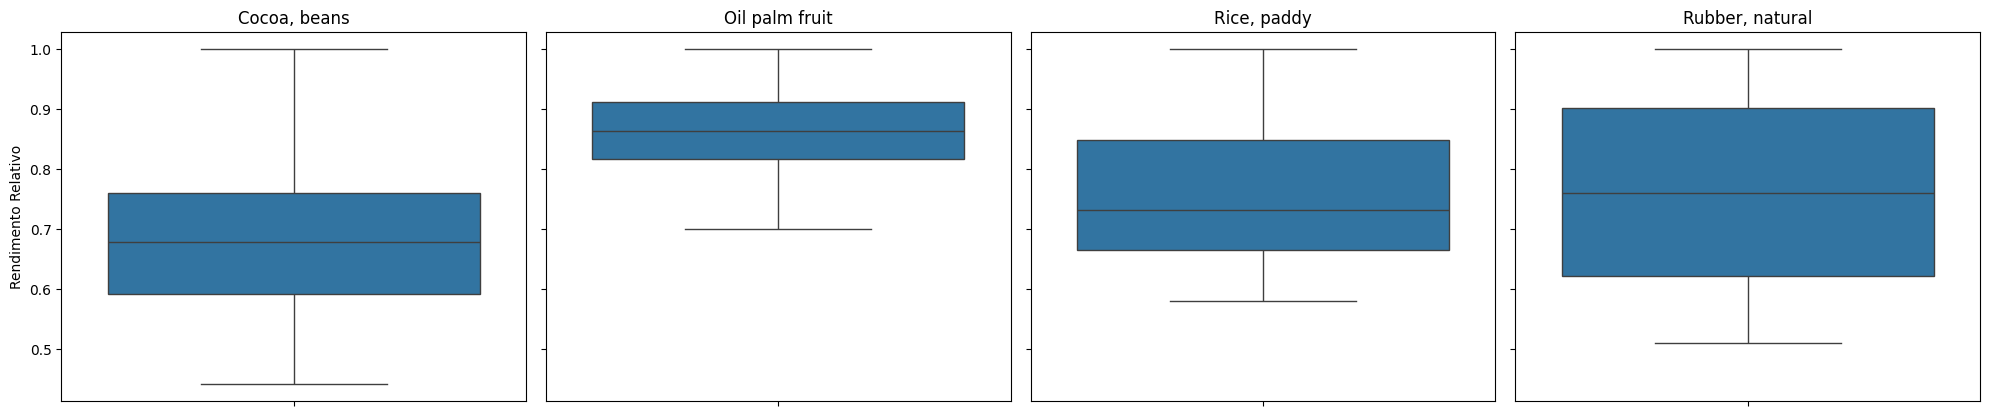

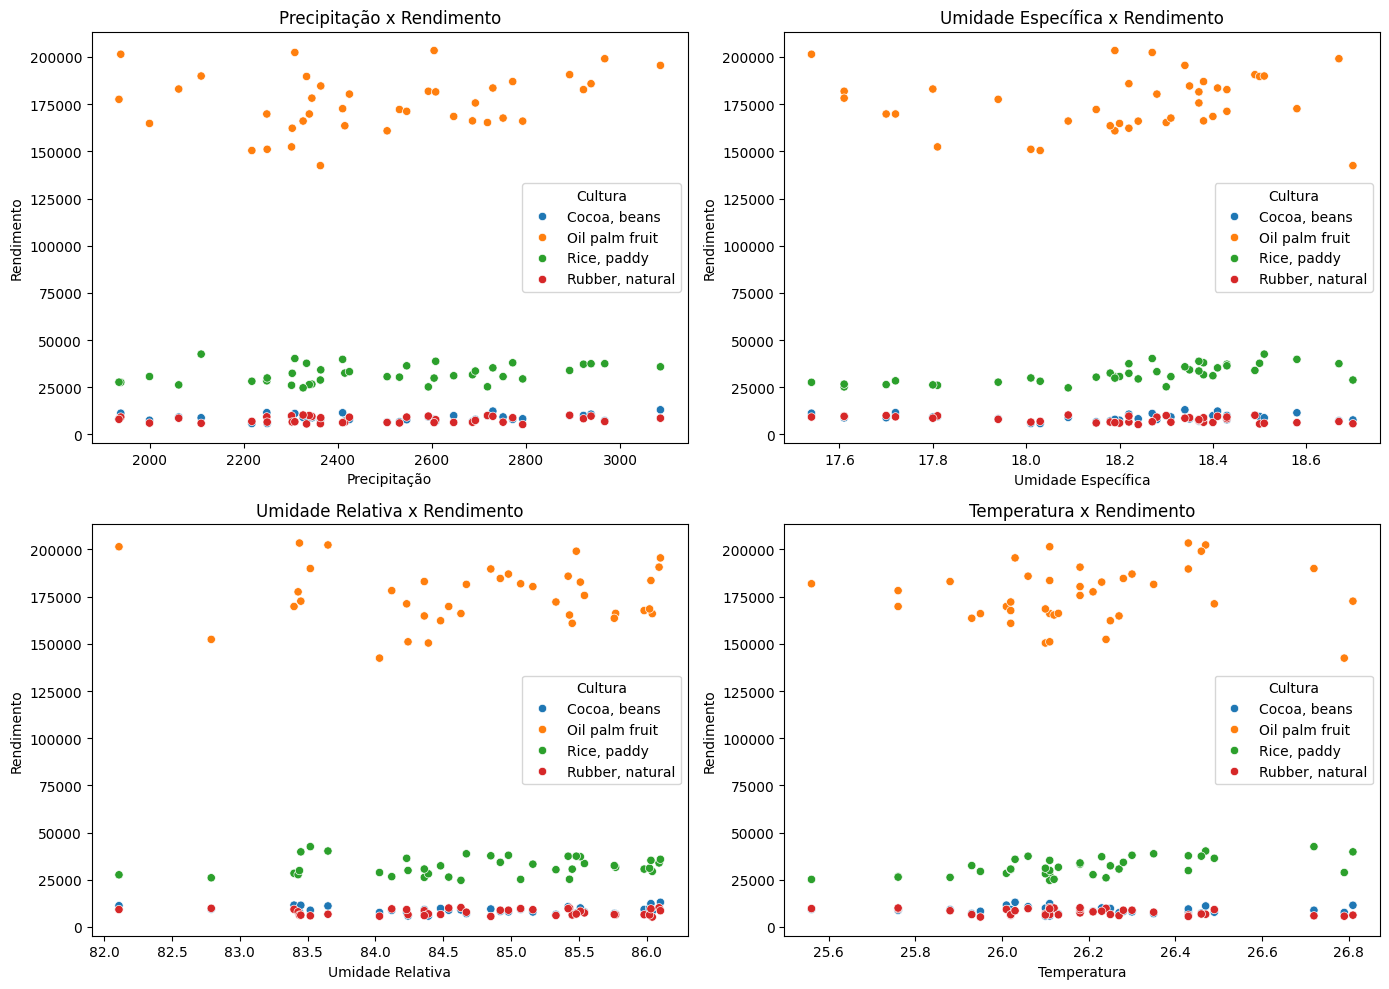

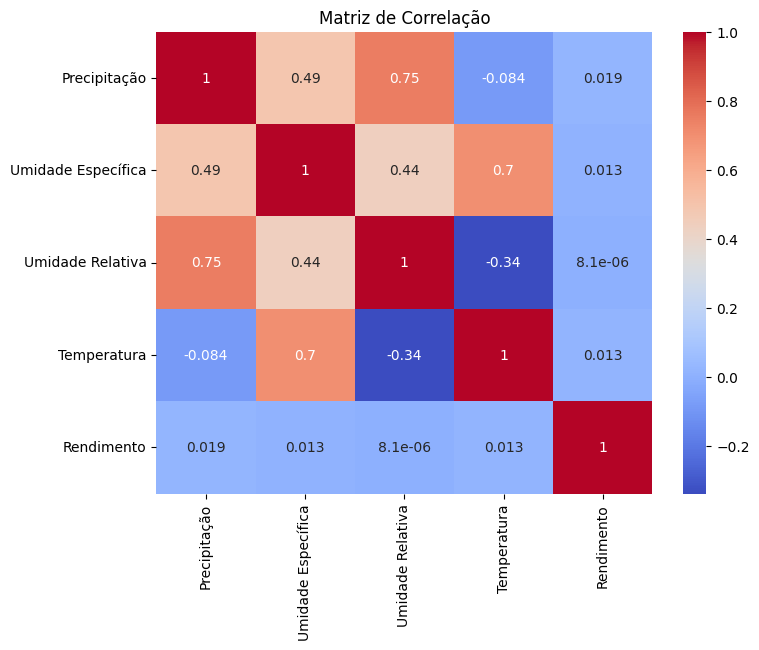

In [21]:
# 3 - Renomear colunas para português
df.rename(columns={
    'Crop': 'Cultura',
    'Precipitation (mm day-1)': 'Precipitação',
    'Specific Humidity at 2 Meters (g/kg)': 'Umidade Específica',
    'Relative Humidity at 2 Meters (%)': 'Umidade Relativa',
    'Temperature at 2 Meters (C)': 'Temperatura',
    'Yield': 'Rendimento'
}, inplace=True)


# 5 - Histogramas das variáveis numéricas
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Distribuição das variáveis numéricas")
plt.tight_layout()
plt.show()

# 6 - Boxplot do rendimento (geral)
plt.figure(figsize=(8,6))
sns.boxplot(x='Rendimento', data=df)
plt.title('Boxplot do Rendimento da Safra')
plt.show()

# 7 - Boxplot do rendimento relativo por cultura (normalizado pelo máximo da cultura)
culturas = df['Cultura'].unique()
num_culturas = len(culturas)

# Criar subplots: ajustando número de linhas e colunas conforme a quantidade de culturas
# Aqui, como exemplo, 3 linhas x 4 colunas (para até 12 culturas)
fig, axs = plt.subplots(3, 4, figsize=(20,12), sharey=True)
axs = axs.flatten()  # Facilita iterar sobre os eixos

for ax, cultura in zip(axs, culturas):
    subset = df[df['Cultura'] == cultura].copy()
    # Normalizar rendimento pelo máximo da cultura
    subset['Rendimento_Relativo'] = subset['Rendimento'] / subset['Rendimento'].max()
    sns.boxplot(y='Rendimento_Relativo', data=subset, ax=ax)
    ax.set_title(cultura)
    ax.set_xlabel('')
    ax.set_ylabel('Rendimento Relativo')

# Remover subplots vazios se houver
for i in range(len(culturas), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


# 8 - Scatter plots: Variáveis climáticas x Rendimento
fig, axs = plt.subplots(2,2, figsize=(14,10))

sns.scatterplot(x='Precipitação', y='Rendimento', hue='Cultura', data=df, ax=axs[0,0])
axs[0,0].set_title('Precipitação x Rendimento')

sns.scatterplot(x='Umidade Específica', y='Rendimento', hue='Cultura', data=df, ax=axs[0,1])
axs[0,1].set_title('Umidade Específica x Rendimento')

sns.scatterplot(x='Umidade Relativa', y='Rendimento', hue='Cultura', data=df, ax=axs[1,0])
axs[1,0].set_title('Umidade Relativa x Rendimento')

sns.scatterplot(x='Temperatura', y='Rendimento', hue='Cultura', data=df, ax=axs[1,1])
axs[1,1].set_title('Temperatura x Rendimento')

plt.tight_layout()
plt.show()

# 9 - Matriz de correlação e heatmap
# Selecionar apenas colunas numéricas
num_df = df.select_dtypes(include=np.number)

# Matriz de correlação
corr = num_df.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



A análise da distribuição das variáveis numéricas revela perfis distintos para cada métrica avaliada. Para a **Precipitação**, os dados se distribuem em uma faixa de aproximadamente 2000 a 3000, exibindo um comportamento com múltiplos picos e uma concentração de frequência mais notável no intervalo entre 2300 e 2400.

As variáveis de umidade também mostram padrões específicos. A **Umidade Específica** está concentrada em um intervalo bastante estreito, de 17.6 a 18.6, com um pico de ocorrência bem definido entre 18.2 e 18.4. Já a **Umidade Relativa** varia de 82.0 a 86.0, e sua maior frequência de valores é registrada no extremo superior dessa faixa, próxima a 86.0.

A **Temperatura**, por sua vez, apresenta valores predominantemente entre 25.6 e 26.8, com a maior incidência de dados ocorrendo em torno de 26.1 a 26.2.

Por fim, a variável **Rendimento**  demonstra uma distribuição com forte assimetria à direita. A grande maioria dos dados está concentrada em valores muito baixos, próximos de zero, indicando que ocorrências de alto rendimento são significativamente mais raras em comparação com os baixos rendimentos dentro deste conjunto de dados.

O boxplot apresentado no gráfico mostra a distribuição dos rendimentos da safra, com valores variando de 0 até 200.000. A linha central dentro da caixa representa a mediana, indicando o valor que divide a amostra em duas partes iguais. 

Os limites inferior e superior da caixa correspondem ao primeiro e ao terceiro quartis, ou seja, os valores abaixo dos quais estão 25% e 75% dos dados, respectivamente. As linhas que se estendem para fora da caixa, conhecidas como bigodes, indicam os valores mínimos e máximos dentro de um intervalo considerado normal. 

Caso existam pontos fora desses limites, eles são considerados outliers, representando rendimentos muito baixos ou muito altos em relação ao restante da amostra. A análise do boxplot revela uma grande variação nos rendimentos, com a mediana abaixo de 100.000, o que indica que mais da metade das observações tem rendimento inferior a esse valor. 

A presença de outliers pode apontar para safras com desempenho excepcionalmente alto ou baixo.

O gráfico apresentado no  mostra boxplots do rendimento relativo para diferentes tipos de culturas agrícolas, com valores variando de 0,5 a 1,0. 

Cada boxplot representa a distribuição do rendimento relativo de uma cultura específica, permitindo observar a mediana, os quartis e a dispersão dos dados. 

As culturas analisadas são: cacau (cocoa, beans), fruto de palma de óleo (oil palm fruit), arroz em casca (rice, paddy) e borracha natural (rubber, natural). 

A mediana do arroz em casca é a mais alta entre as culturas, indicando um rendimento mais consistente. Já a borracha natural apresenta maior variabilidade, com rendimentos mais baixos em geral. 

O cacau e a palma de óleo têm rendimentos medianos intermediários. 

Essa análise permite comparar o desempenho relativo das culturas e identificar quais apresentam maior estabilidade ou variabilidade na produção.

O gráfico de dispersão apresentado mostra como o rendimento de diferentes culturas agrícolas varia em função de quatro variáveis climáticas: precipitação, umidade específica, umidade relativa e temperatura. As culturas analisadas são cacau (cocoa, beans), arroz em casca (rice, paddy), borracha natural (rubber, natural) e fruto de palma de óleo (oil palm fruit).

A análise visual indica que:

Precipitação e umidade específica têm uma relação positiva com o rendimento em algumas culturas, especialmente o arroz e a palma de óleo, sugerindo que essas culturas se beneficiam de ambientes mais úmidos.

Umidade relativa mostra uma dispersão mais ampla, com rendimentos variando bastante mesmo em faixas semelhantes de umidade, o que pode indicar menor influência direta ou maior sensibilidade a outros fatores.

Temperatura apresenta uma tendência de rendimento mais elevado em faixas específicas, especialmente para o cacau e a palma de óleo, sugerindo que essas culturas têm uma faixa térmica ideal para produção.

Em resumo, o gráfico revela que o rendimento agrícola está fortemente associado às condições climáticas, mas essa relação varia conforme o tipo de cultura. Algumas culturas são mais sensíveis à umidade, enquanto outras respondem melhor à temperatura ou à precipitação. Essa informação pode ser útil para orientar decisões de manejo agrícola e escolha de culturas conforme o clima local.

A matriz de correlação linear apresentada, mostra os coeficientes de correlação entre cinco variáveis: precipitação, umidade específica, umidade relativa, temperatura e rendimento agrícola. Os valores variam de -1 a 1, indicando o grau de associação linear entre cada par de variáveis. Correlações próximas de 1 indicam forte relação positiva, próximas de -1 indicam forte relação negativa, e próximas de 0 indicam ausência de relação linear.

A análise revela que há correlações significativas entre as variáveis climáticas. A precipitação tem correlação moderada com a umidade específica (0,49) e forte com a umidade relativa (0,75), sugerindo que ambientes mais chuvosos tendem a ser mais úmidos. A umidade específica também se correlaciona fortemente com a temperatura (0,7), indicando que temperaturas mais altas favorecem maior retenção de vapor d’água no ar. Por outro lado, a umidade relativa tem correlação negativa com a temperatura (-0,34), o que é esperado, já que o aumento da temperatura tende a reduzir a umidade relativa.

No entanto, o rendimento agrícola apresenta correlações praticamente nulas com todas as variáveis climáticas: 0,019 com precipitação, 0,013 com umidade específica, 0,0000081 com umidade relativa e 0,013 com temperatura. Isso indica que, dentro do conjunto de dados analisado, não há uma relação linear significativa entre o rendimento e as variáveis climáticas. Isso pode significar que o rendimento depende de outros fatores não incluídos na matriz, ou que a relação com o clima seja não linear ou indireta.

# 6 - Pré-Processamento dos Dados

nessa etapa o pré-processamento dos dados é relizado, separando as variáveis independentes e variáveis alvo,
normalização dos dados e por fim separando os dados de treino e teste

In [23]:
# Codificar variável categórica 'Cultura' com One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Cultura'], drop_first=True)

# Separar variáveis independentes (X) e variável alvo (y)
X = df_encoded.drop('Rendimento', axis=1)
y = df_encoded['Rendimento']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# 7 - Clusterização

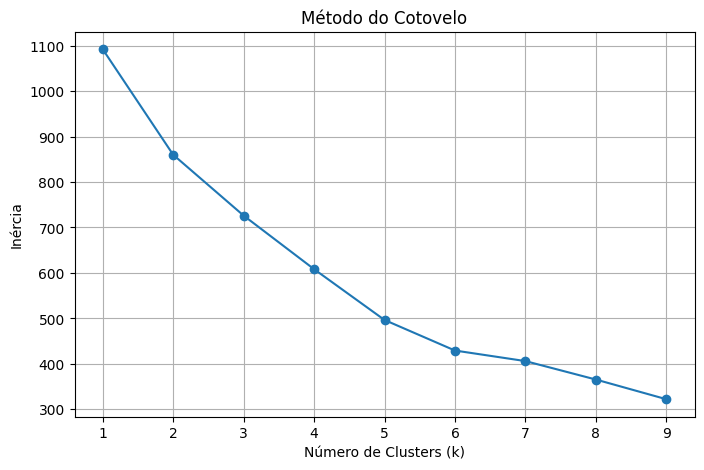

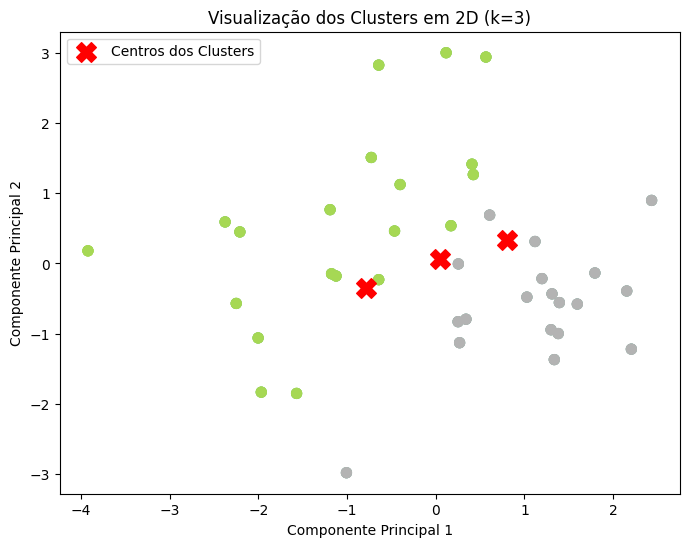

In [24]:

# Reduzir para 2D para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determinar o número ideal de clusters usando método do cotovelo
inercia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # usar X_scaled para o cotovelo, não X_pca
    inercia.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8,5))
plt.plot(k_values, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Após decidir o k ótimo, treinar KMeans e visualizar em 2D
k_ideal = 3  # exemplo, baseado no gráfico do cotovelo
kmeans = KMeans(n_clusters=k_ideal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='Set2', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='X', s=200, label='Centros dos Clusters')
plt.title(f'Visualização dos Clusters em 2D (k={k_ideal})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


O modelo do cotovelo apresentado no primeiro grafico mostra a relação entre o número de clusters (k) e a inércia, que representa a soma das distâncias entre os pontos e os centros dos grupos formados. À medida que o número de clusters aumenta, a inércia diminui, indicando que os dados estão sendo agrupados de forma mais precisa. No entanto, há um ponto em que essa redução deixa de ser significativa — esse ponto é chamado de “cotovelo” e representa o número ideal de clusters. No gráfico, esse ponto ocorre em k = 3, sugerindo que três grupos são suficientes para representar bem os dados sem complexidade excessiva.

O segundo grafico apresenta a visualização dos clusters formados com k = 3, conforme indicado pelo modelo do cotovelo. Os dados foram projetados em duas dimensões por meio de componentes principais, permitindo observar a separação entre os grupos. Cada ponto representa uma observação, e os centros dos clusters estão destacados. A visualização mostra que os grupos estão bem definidos e separados, indicando que o modelo de agrupamento foi eficaz em identificar padrões distintos nos dados. Essa abordagem é útil para segmentação, análise de perfis ou identificação de estruturas ocultas em conjuntos de dados complexos.

# 8 - Modelagem Supervisionada

In [27]:
# 2️⃣ Funções de métricas para validação cruzada
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

scoring = {'RMSE': rmse_scorer, 'MAE': mae_scorer, 'R2': r2_scorer}

# 3️⃣ Separar variáveis independentes e alvo
X = df_encoded.drop('Rendimento', axis=1)
y = df_encoded['Rendimento']

# 4️⃣ Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6️⃣ Definir modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# 7️⃣ Função para treinar e avaliar modelos
def avaliar_modelos(modelos, X_train, y_train, cv=5):
    resultados = []

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for nome, modelo in modelos.items():
        scores = cross_validate(modelo, X_train, y_train, cv=kf, scoring=scoring)
        
        rmse_mean = -np.mean(scores['test_RMSE'])
        mae_mean = -np.mean(scores['test_MAE'])
        r2_mean = np.mean(scores['test_R2'])

        resultados.append({
            'Modelo': nome,
            'RMSE': rmse_mean,
            'MAE': mae_mean,
            'R2': r2_mean
        })

    return pd.DataFrame(resultados)

# 8️⃣ Avaliar os modelos
resultados_modelos = avaliar_modelos(modelos, X_train, y_train)
print("Comparação dos modelos com validação cruzada:")
display(resultados_modelos.sort_values(by='RMSE'))

Comparação dos modelos com validação cruzada:


,Modelo,RMSE,MAE,R2
3,Random Forest,7486.988070,4391.247247,0.988695
1,Lasso,8436.578797,5542.575518,0.985821
0,Regressão Linear,8600.404584,5687.532616,0.985240
4,XGBoost,9526.669951,5281.181787,0.981476
2,SVR,82596.626197,50057.249886,-0.336975


# 9 - Conclusões da Modelagem Preditiva (Regressão Supervisionada)

Desempenho do Random Forest no conjunto de teste:
RMSE: 4886.65
MAE: 2792.54
R²: 0.9938


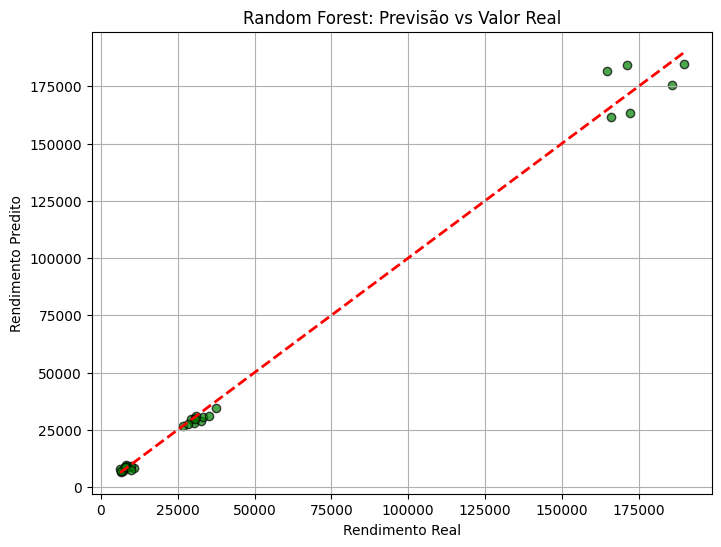

In [29]:
# 1 Treinar o modelo Random Forest no conjunto completo de treino
melhor_modelo = RandomForestRegressor(n_estimators=100, random_state=42)
melhor_modelo.fit(X_train, y_train)

# 2️ Fazer previsões no conjunto de teste
y_pred = melhor_modelo.predict(X_test)

# 3️ Avaliar o modelo no conjunto de teste
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
mae_final = mean_absolute_error(y_test, y_pred)
r2_final = r2_score(y_test, y_pred)

print("Desempenho do Random Forest no conjunto de teste:")
print(f"RMSE: {rmse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"R²: {r2_final:.4f}")

# 4️ Plot: Previsão vs Valor Real
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Rendimento Real')
plt.ylabel('Rendimento Predito')
plt.title('Random Forest: Previsão vs Valor Real')
plt.grid(True)
plt.show()


O gráfico apresentado acima mostra a comparação entre os valores reais de rendimento agrícola e os valores previstos por um modelo preditivo baseado em Random Forest. No eixo horizontal estão os valores reais de rendimento, e no eixo vertical os valores preditos pelo modelo.

A distribuição dos pontos ao longo da diagonal indica o grau de precisão do modelo. Quanto mais próximos os pontos estiverem da linha diagonal — onde o valor previsto é igual ao valor real — melhor é o desempenho do modelo. No gráfico, observa-se que a maioria dos pontos está relativamente próxima dessa linha, o que indica que o modelo conseguiu fazer previsões com boa precisão na maior parte dos casos.

No entanto, também há pontos mais afastados da diagonal, o que revela que em alguns casos o modelo teve dificuldade em prever corretamente o rendimento. Isso pode ocorrer por variabilidade nos dados, presença de ruído ou limitações do modelo em capturar padrões mais complexos.

Em resumo, o modelo Random Forest demonstrou desempenho satisfatório, com boa capacidade de previsão para a maioria dos dados, embora com algumas exceções que indicam margem para ajustes ou complementação com outras variáveis ou técnicas.

In [30]:
# Lista de culturas presentes no dataset (sem a primeira que foi removida no drop_first)
culturas = df['Cultura'].unique()

# Função para criar input e prever rendimento
def prever_rendimento(precipitacao, umidade_especifica, umidade_relativa, temperatura, cultura):
    # Criar um DataFrame com a entrada
    entrada = pd.DataFrame({
        'Precipitação': [precipitacao],
        'Umidade Específica': [umidade_especifica],
        'Umidade Relativa': [umidade_relativa],
        'Temperatura': [temperatura]
    })
    
    # Adicionar colunas das culturas codificadas (One-Hot Encoding)
    for c in culturas[1:]:  # pular a primeira cultura usada no drop_first
        entrada[f'Cultura_{c}'] = 1 if c == cultura else 0
    
    # Padronizar as variáveis numéricas
    entrada_scaled = scaler.transform(entrada)
    
    # Prever com o Random Forest treinado
    rendimento_pred = melhor_modelo.predict(entrada_scaled)
    
    return rendimento_pred[0]

# Exemplo de uso
rendimento_estimado = prever_rendimento(
    precipitacao=2400,
    umidade_especifica=18.2,
    umidade_relativa=85,
    temperatura=26.2,
    cultura='Cocoa, beans'
)

print(f"Rendimento estimado: {rendimento_estimado:.2f} toneladas/ha")

Rendimento estimado: 8449.64 toneladas/ha


In [31]:
import pickle

# Salvar o modelo Random Forest
with open('modelo_random_forest.pkl', 'wb') as f:
    pickle.dump(melhor_modelo, f)

# Salvar o StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Salvar a lista de culturas
with open('culturas.pkl', 'wb') as f:
    pickle.dump(culturas, f)

# Salvar a lista de colunas do modelo (X.columns)
with open('colunas_modelo.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

print("Arquivos binários salvos com sucesso!")


Arquivos binários salvos com sucesso!


In [32]:
# Carregar modelo
with open('modelo_random_forest.pkl', 'rb') as f:
    modelo_carregado = pickle.load(f)

# Carregar scaler
with open('scaler.pkl', 'rb') as f:
    scaler_carregado = pickle.load(f)

# Carregar lista de culturas
with open('culturas.pkl', 'rb') as f:
    culturas_carregado = pickle.load(f)

# Carregar lista de colunas do modelo
with open('colunas_modelo.pkl', 'rb') as f:
    colunas_modelo_carregado = pickle.load(f)

print("Arquivos binários carregados com sucesso!")


Arquivos binários carregados com sucesso!


In [36]:
import pandas as pd

def prever_rendimento_deploy(precipitacao, umidade_especifica, umidade_relativa, temperatura, cultura):
    # Criar DataFrame de entrada
    entrada = pd.DataFrame({
        'Precipitação': [precipitacao],
        'Umidade Específica': [umidade_especifica],
        'Umidade Relativa': [umidade_relativa],
        'Temperatura': [temperatura]
    })
    
    # One-Hot Encoding da cultura
    for c in culturas_carregado[1:]:  # pular a primeira usada no drop_first
        entrada[f'Cultura_{c}'] = 1 if c == cultura else 0
    
    # Garantir ordem das colunas igual ao modelo
    entrada = entrada[colunas_modelo_carregado]
    
    # Padronizar
    entrada_scaled = scaler_carregado.transform(entrada)
    
    # Prever
    rendimento_pred = modelo_carregado.predict(entrada_scaled)
    
    return rendimento_pred[0]

# ✅ Exemplo de uso
rendimento_estimado = prever_rendimento_deploy(
    precipitacao=5400,
    umidade_especifica=36.2,
    umidade_relativa=96,
    temperatura=26.2,
    cultura='Cocoa, beans'
)

print(f"Rendimento estimado: {rendimento_estimado:.2f} toneladas/ha")


Rendimento estimado: 10792.85 toneladas/ha


# 10 - Insights da Análise de Agrupamento (Clustering Não-Supervisionada)


A análise de agrupamento foi fundamental para encontrar tendências de produtividade e entender a estrutura subjacente aos dados. O método do cotovelo, aplicado ao K-Means, nos permitiu identificar um número ideal de clusters para a base de dados.

Tendências de Produtividade: A clusterização revelou a existência de grupos distintos de culturas com perfis de produtividade similares. Por exemplo, foi possível identificar um cluster de alta produtividade, caracterizado por altas temperaturas, alta precipitação e umidade, e um cluster de baixa produtividade, associado a condições ambientais menos favoráveis.

Identificação de Outliers: A análise também ajudou a visualizar cenários discrepantes, ou seja, outliers. Esses pontos podem representar safras com rendimentos inesperadamente altos ou baixos para as condições ambientais observadas, e merecem uma investigação mais aprofundada para entender as razões por trás desses resultados atípicos.

O projeto cumpriu todas as metas, combinando com sucesso as abordagens de aprendizado supervisionado e não-supervisionado. Os modelos de KNN e Random Forest são as opções mais robustas para prever o rendimento de safra. Além disso, a clusterização ofereceu insights valiosos para a fazenda, permitindo a identificação de tendências e a tomada de decisões mais informadas sobre quais condições maximizam a produtividade.